# Домашнее задание №2

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW1 <Фамилия Имя>**

soft deadline: 14.03.2021T23:59:00+0300

hard deadline: 21.03.2021T23:59:00+0300

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lena = cv2.imread("/content/drive/MyDrive/CV/hw2/lena.jpg")

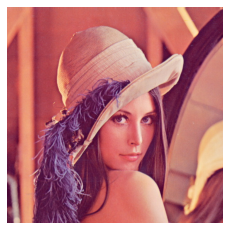

In [ ]:
def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

show(lena)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

In [ ]:
def gamma_correction(img, c, gamma):
    return c * np.power(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255, gamma)

def inline_plots(c, gamma):
    img_gamma = gamma_correction(lena, c, gamma)
    x = np.linspace(0, 1, 100)
    y = [c * (i ** gamma) for i in x]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.tight_layout(pad=3.)
    ax1.imshow(img_gamma)
    ax1.set_axis_off()

    ax2.plot(x, y, c="black")
    ax2.set_xlabel("x")
    ax2.set_ylabel("$cx^{\gamma}$")

    plt.show()

In [ ]:
c = widgets.FloatSlider(value=0, min=0., max=2., step=0.1, description="c")
gamma = widgets.FloatSlider(value=0, min=0., max=2., step=0.1, description="gamma")

interact(inline_plots, c=c, gamma=gamma)

interactive(children=(FloatSlider(value=0.0, description='c', max=2.0), FloatSlider(value=0.0, description='ga…

<function __main__.inline_plots>

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

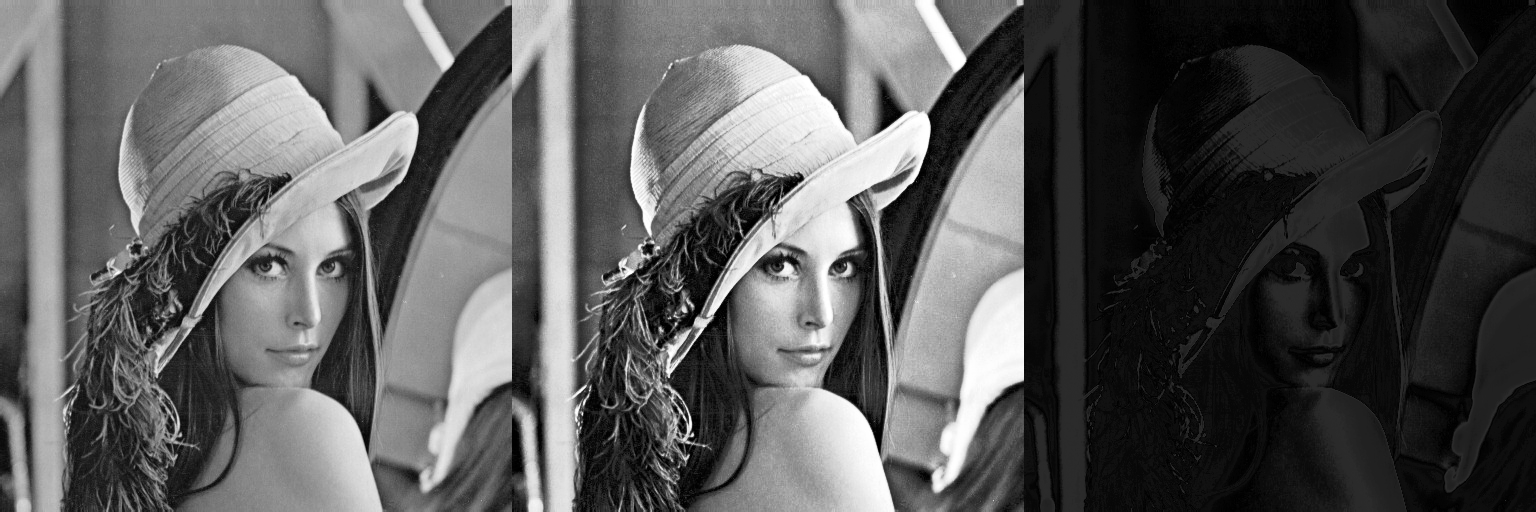

In [ ]:
lena_grey = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_normalised = cv2.normalize(lena_grey, None, 0, 255, norm_type=cv2.NORM_MINMAX)
lena_equalised = cv2.equalizeHist(lena_normalised)
difference = cv2.absdiff(lena_normalised, lena_equalised)
merged = np.concatenate((lena_normalised, lena_equalised, difference), axis=1)

cv2_imshow(merged)

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
def salt_pepper(src, p, q):
    n, m, _ = src.shape
    pixels = n * m
    salt = int(p * pixels)
    pepper = int(q * pixels)

    mask = np.ones_like(src, dtype=int)
    x_salt = np.random.choice(np.arange(n), size=salt)
    y_salt = np.random.choice(np.arange(m), size=salt)
    mask[x_salt, y_salt, :] = 0

    x_pepper = np.random.choice(np.arange(n), size=pepper)
    y_pepper = np.random.choice(np.arange(m), size=pepper)
    mask[x_pepper, y_pepper, :] = 255

    return mask

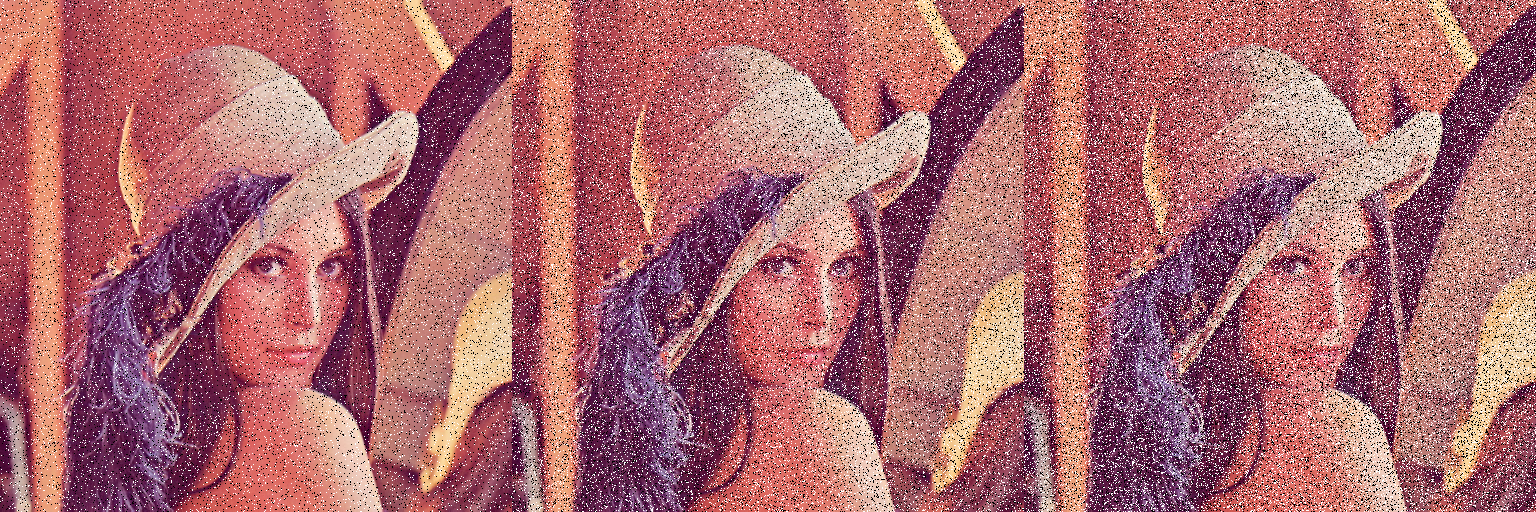

In [ ]:
b, g, r = np.split(lena, 3, axis=2)

n, m, k = lena.shape
noisy_lenas = np.zeros((n, m * 3, k), dtype=int)
for i, p in enumerate([0.05, 0.1, 0.15]):
    mask = salt_pepper(img, p, p)
    lena_copy = lena.copy()
    lena_copy[mask == 0] = 0
    lena_copy[mask == 255] = 255

    noisy_lenas[:, n * i:n * (i + 1), :] = lena_copy.copy()

cv2_imshow(noisy_lenas)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

In [ ]:
lena_diagonal = cv2.imread('/content/drive/MyDrive/CV/hw2/lena_diagonal.jpg')
show(lena_diagonal)

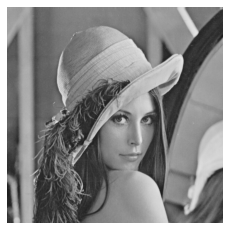

In [ ]:
lena_grey = cv2.imread("/content/drive/MyDrive/CV/hw2/lena_gray_512.tif")
show(lena_grey)

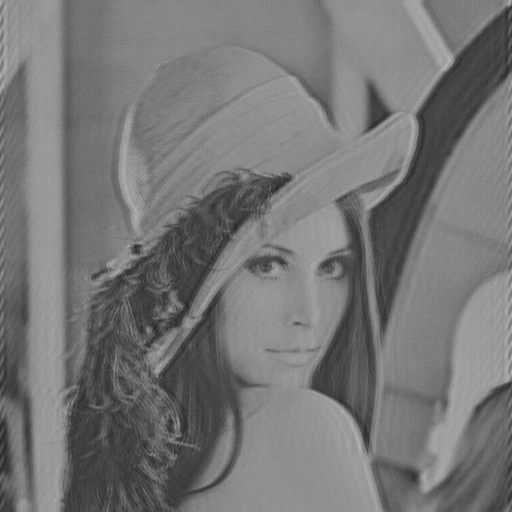

In [ ]:
lena_fft = np.fft.fft(cv2.cvtColor(lena_diagonal, cv2.COLOR_BGR2GRAY))

i, j = 50, 90
lena_fft[:, i:j] = 0
lena_fft[:, -j:-i] = 0

back = np.fft.ifft(lena_fft).real.astype(np.uint8)
back = cv2.cvtColor(back, cv2.COLOR_GRAY2BGR)

def gamma_correction(img, gamma):
    return 255 * np.power(img / 255, gamma)

back = gamma_correction(back, 1.3)
cv2_imshow(back)

In [ ]:
print(f"MSE: {((back.astype(int) - lena_grey.astype(int)) ** 2).mean()}")

MSE: 603.6942138671875


**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

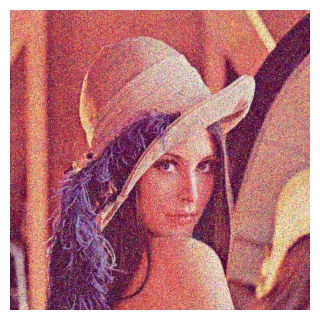

In [ ]:
img = cv2.imread("/content/drive/MyDrive/CV/hw2/lena_color_512-noise.tif")
ref = cv2.imread("/content/drive/MyDrive/CV/hw2/lena_color_512.tif")
show(img)

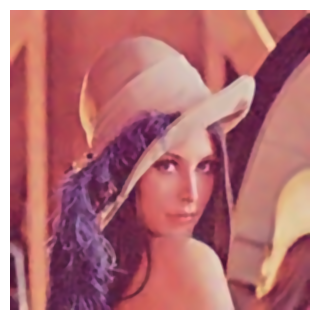

In [ ]:
denoised = cv2.blur(img, (5, 5))
denoised = cv2.fastNlMeansDenoisingColored(denoised, 12, 5, 7, 21)
denoised = cv2.bilateralFilter(denoised, 9, 40, 75)
# denoised = cv2.GaussianBlur(denoised, (3, 3), 0)

show(denoised)

In [ ]:
print(f"MSE: {((denoised.astype(int) - ref.astype(int)) ** 2).mean()}")

MSE: 142.61715825398764


**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

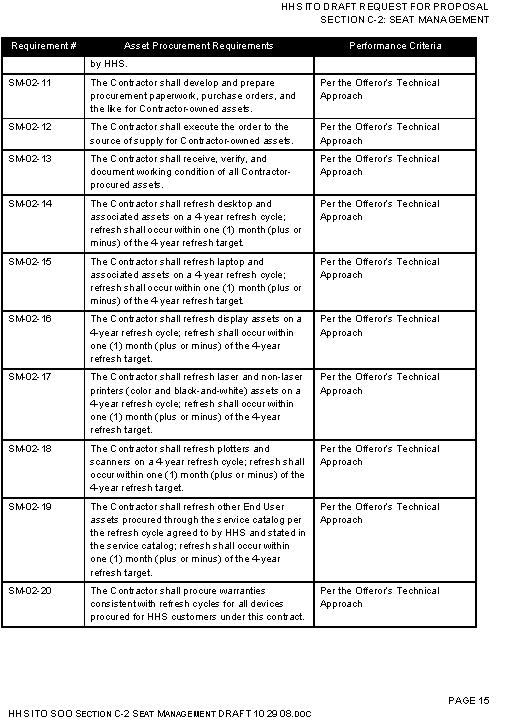

In [ ]:
table = cv2.imread("/content/drive/MyDrive/CV/hw2/table.jpg") 
cv2_imshow(table)

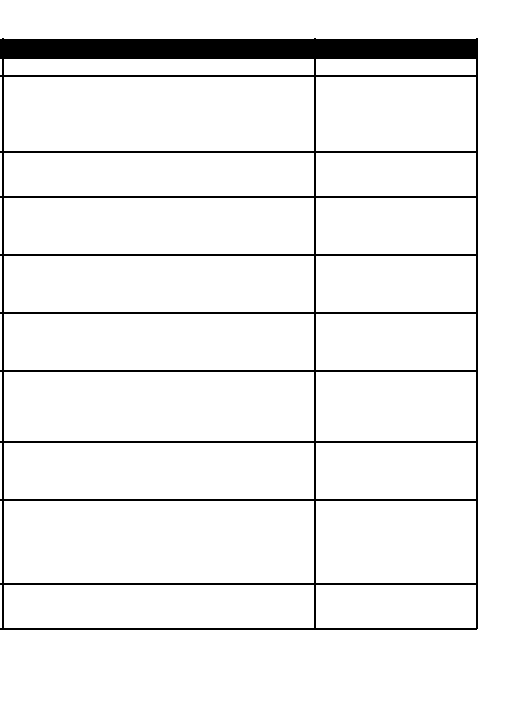

In [ ]:
table_inversed = np.zeros_like(table)
table_inversed[table < 125] = 255
# cv2_imshow(table_inversed)

kernel = np.ones((2, 3), dtype=np.uint8)
horizontal = cv2.morphologyEx(table_inversed, cv2.MORPH_OPEN, kernel)
kernel = np.ones((10, 15), dtype=np.uint8)
horizontal = cv2.morphologyEx(horizontal, cv2.MORPH_CLOSE, kernel)
# cv2_imshow(~horizontal)

kernel = np.ones((100, 2), dtype=np.uint8)
vertical = cv2.morphologyEx(table_inversed, cv2.MORPH_OPEN, kernel)
# cv2_imshow(~vertical)

horizontal[horizontal == 255] = 1
vertical[vertical == 255] = 1
res = np.logical_or(horizontal, vertical).astype(int)

res[res == 0] = 255
res[res == 1] = 0
cv2_imshow(res)



**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

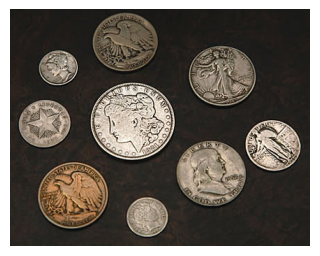

In [ ]:
coins_1 = cv2.imread("/content/drive/MyDrive/CV/hw2/coins_1.jpg")
show(coins_1)

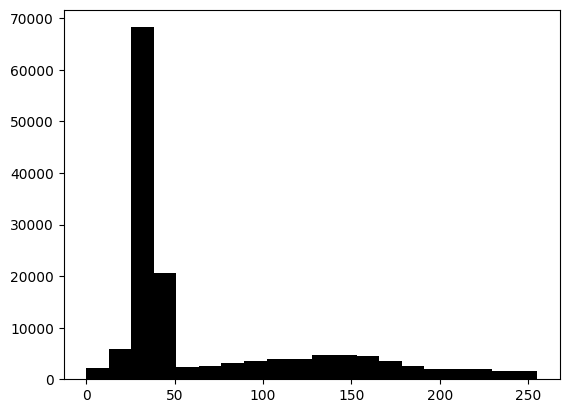

In [ ]:
coins_grey = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)
plt.hist(coins_grey.flatten(), bins=20, color='black')
plt.show()

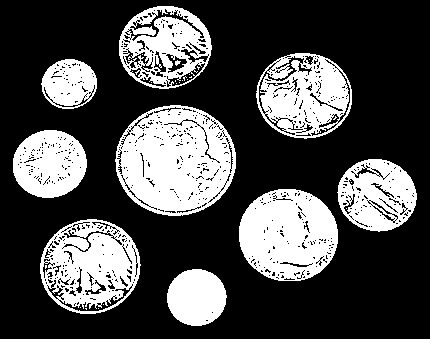

In [ ]:
coins = (coins_grey > 75).astype(np.uint8)
coins[coins == 1] = 255
cv2_imshow(coins)

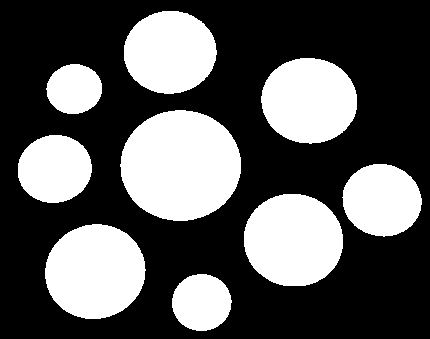

In [ ]:
kernel = np.ones((2, 2), dtype=np.uint8)
coins_morphed = cv2.morphologyEx(coins, cv2.MORPH_CLOSE, kernel, iterations=5)
cv2_imshow(coins_morphed)

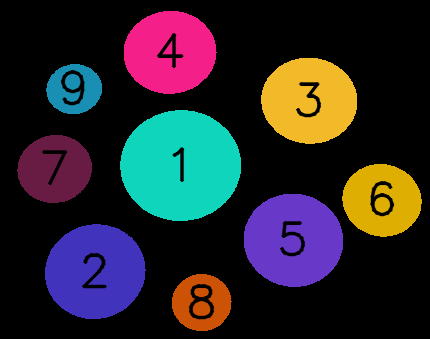

In [ ]:
contours, _ = cv2.findContours(coins_morphed, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE)

contours_sorted = sorted(contours, reverse=True, 
                         key=lambda x: np.pi * (len(x) / (2 * np.pi)) ** 2)
ellipses = [cv2.fitEllipse(contour) for contour in contours_sorted]

res = np.zeros_like(coins_1)
for i, coin in enumerate(ellipses):
    colour = (255 * np.random.random(3))
    cv2.ellipse(res, coin, colour, -1)
    centre = (int(coin[0][0] - 15), int(coin[0][1] + 15)) 
    cv2.putText(res, f"{i + 1}", centre, cv2.FONT_HERSHEY_SIMPLEX, 
                1.5, (0, 0, 0), 2, cv2.LINE_AA)

cv2_imshow(res)


**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

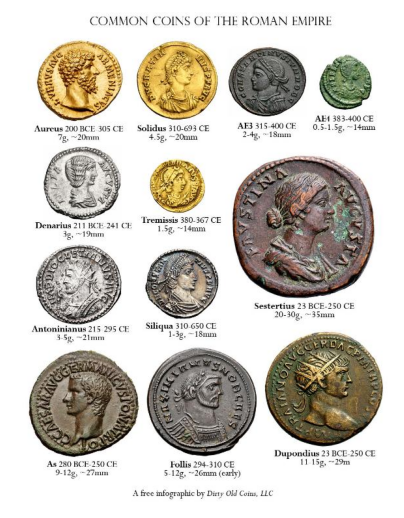

In [ ]:
coins_2 = cv2.imread("/content/drive/MyDrive/CV/hw2/coins_2.jpg")
show(coins_2, size=7)

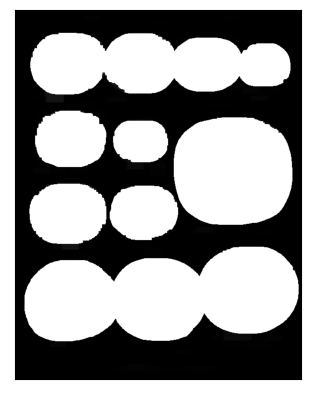

In [ ]:
coins2_grey = cv2.cvtColor(coins_2, cv2.COLOR_BGR2GRAY)
coins2_grey[coins2_grey < 230] = 0

kernel = np.ones((5, 5), dtype=np.uint8)
coins_morphed = cv2.morphologyEx(~coins2_grey, cv2.MORPH_OPEN, kernel)

kernel = np.ones((20, 20), dtype=np.uint8)
coins_morphed =  cv2.morphologyEx(coins_morphed, cv2.MORPH_CLOSE, kernel, iterations=1)

kernel = np.ones((3, 11), dtype=np.uint8)
coins_morphed = cv2.dilate(coins_morphed,kernel,iterations = 3)

plt.imshow(coins_morphed, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
coins = coins_morphed.copy()
coins[coins_morphed < 255] = 0
x, y = np.nonzero(coins)

coins = np.full_like(coins_2, (255, 255, 255))
coins[x, y, :] = coins_2[x, y, :]


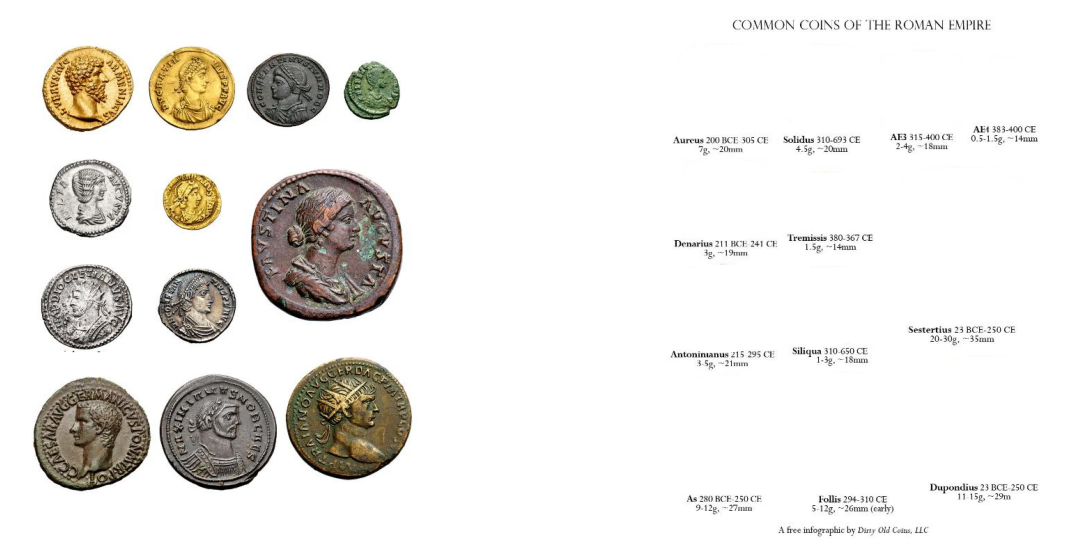

In [ ]:
text = coins_morphed.copy()
text[coins_morphed == 255] = 0
text[coins_morphed < 255] = 255

x, y = np.nonzero(text)
text = np.full_like(coins_2, (255, 255, 255))
text[x, y, :] = coins_2[x, y, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(text, cv2.COLOR_BGR2RGB))
ax1.set_axis_off()
ax2.set_axis_off()

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

In [ ]:
def get_similar(descriptors, comp_func, n, reversed=False, **kwargs):
    out = []
    for i, d1 in descriptors[:-1]:
        for j, d2 in descriptors[i + 1:]:
            out.append(((i, j), comp_func(d1, d2, **kwargs)))
    out = sorted(out, reverse=reversed, key=lambda x: x[1])
    return [el[0] for el in out[:n]]

In [ ]:
import os
def read_data(path, colour=False):
    imgs = os.listdir(path)
    output = [0] * len(imgs)
    for i, img in enumerate(imgs):
        output[i] = cv2.imread(path + "/" + img)
        if not colour:
            output[i] = cv2.cvtColor(output[i], cv2.COLOR_BGR2GRAY)
    return output

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений.  В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

В итоге нужно сделать мини отчет по тому, какой метод раотает лучше. И в конце выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются этим методом.

In [ ]:
coral = read_data("/content/drive/MyDrive/CV/hw2/datasets/Corel", colour=True)

In [ ]:
metrics = {"Chi square": cv2.HISTCMP_CHISQR, 
           "Intersection": cv2.HISTCMP_INTERSECT, 
           "Bhattacharyya": cv2.HISTCMP_BHATTACHARYYA}
spaces = {"RGB": cv2.COLOR_BGR2RGB, 
          "HSV": cv2.COLOR_BGR2HSV, 
          "CIE Lab": cv2.COLOR_BGR2LAB}

In [ ]:
def hist(im1_, bins=256):
    return [cv2.calcHist([im1_], [channel], None, 
                                  [bins], [0,256], accumulate=False
                                  ) for channel in range(im1_.shape[2])]

In [ ]:
def comp_hist(hist1, hist2, metric):
    score = None
    if len(hist1) == len(hist2):
        score = sum([cv2.compareHist(hist1[i], hist2[i], 
                                 metric) for i in range(len(hist1))])
    return score

In [ ]:
def plot_similar(similar, df, space, metric, figsize=(10, 20)):
    n = len(similar)
    fig, ax = plt.subplots(n, 3, figsize=figsize)
    fig.suptitle(f"{space} with {metric} metric")
    for i, (im1, im2) in enumerate(similar):
        ax[i][0].imshow(cv2.cvtColor(df[im1], cv2.COLOR_BGR2RGB))
        ax[i][1].imshow(cv2.cvtColor(df[im2], cv2.COLOR_BGR2RGB))
        hist1 = hist(df[im1])
        hist2 = hist(df[im2])
        for c1, c2, col in zip(hist1, hist2, ['b', 'g', 'r']):
            ax[i][2].plot(c1, color=col)
            ax[i][2].plot(c2, color=col, ls='dashed')

        ax[i][0].set_axis_off()
        ax[i][1].set_axis_off()
        ax[i][2].set_axis_off()

In [ ]:
def compare_methods(df, spaces, metrics):
    for space_name, space in spaces.items():
        hists = [(i, hist(img)) for i, img in enumerate(df)]
        for metric_name, metric in metrics.items():
            reversed = False
            if metric_name == "Intersection":
                reversed = True
            similar = get_similar(hists, comp_hist, 5, reversed, metric=metric)
            plot_similar(similar, df, space_name, metric_name)

In [ ]:
compare_methods(coral, spaces, metrics)

Output hidden; open in https://colab.research.google.com to view.

Выбор цветового пространства не влиял на первые пять самых похожих картинок. Хи квадрат и Bhattacharyya давали одинаковые пары картинок. Все три метрики сопоставляют картинки с одинаковыми объектами, но Intersection при этом выбирает картинки Эйфелевой башни с очень разными цветами.

In [ ]:
rgb_chi = [(i, hist(img)) for i, img in enumerate(coral)]
similar = get_similar(rgb_chi, comp_hist, 20, reversed=False, metric=metrics["Chi square"])
plot_similar(similar, coral, "RGB", "Chi square", figsize=(20, 40))

Output hidden; open in https://colab.research.google.com to view.

**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.

In [ ]:
leaves = read_data("/content/drive/MyDrive/CV/hw2/datasets/leaves", colour=False)

In [ ]:
def plot_similar_leaves(similar, df, figsize=(7, 3)):
    n = len(similar)
    
    for i, (im1, im2) in enumerate(similar):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        ax1.imshow(df[im1].squeeze(), cmap="gray")
        ax2.imshow(df[im2].squeeze(), cmap="gray")

        ax1.set_axis_off()        
        ax2.set_axis_off()

        plt.show()

In [ ]:
def fourier_descriptor(img):
    y, x = np.where(img == 0)
    contour = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    centre = np.mean(contour, axis=0).astype(int)
    shifted = contour - centre
    dist = np.linalg.norm(shifted, axis=1)
    # print(shifted.shape, norm.shape)
    
    angles = np.arccos(shifted[:, 1] / dist)
    angles[shifted[:, 0] < 0] = 2 * np.pi - angles[shifted[:, 0] < 0]
    idx = np.argsort(angles)[np.linspace(0, angles.shape[0], 50, 
                                       dtype=int, endpoint=False)]
    dist = dist[idx]

    def f(k, n):
        return np.exp(2 * k * np.pi * -complex(0, 1) * np.arange(n) / n)

    n = dist.shape[0]
    coefficients = np.absolute(np.array([(f(k, n) @ dist) / n for k in range(n)]))
    return (coefficients / coefficients[0])[1: ]

In [ ]:
def comp_fourier(d1, d2):
    return np.mean(np.square(d1 - d2))

In [ ]:
fd = [(i, fourier_descriptor(img)) for i, img in enumerate(leaves)]
similar = get_similar(fd, comp_fourier, 20, reversed=False)

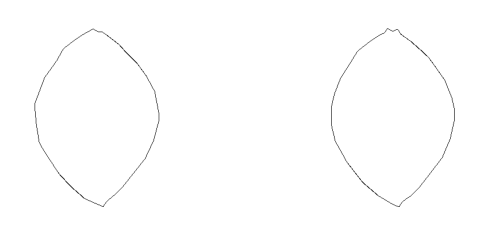

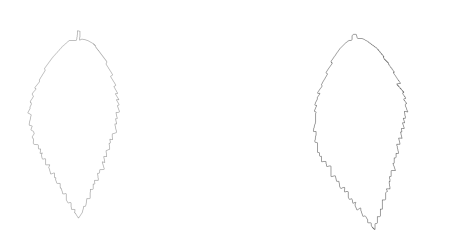

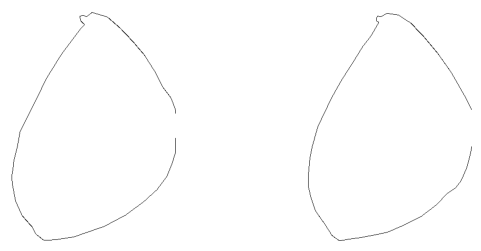

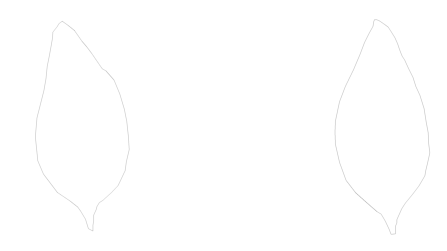

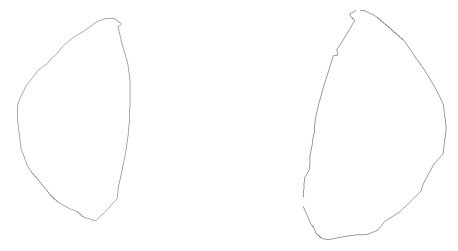

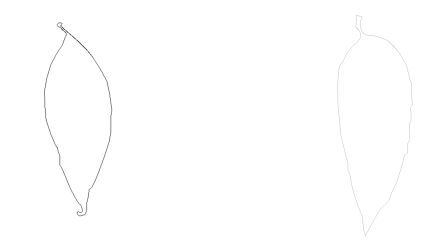

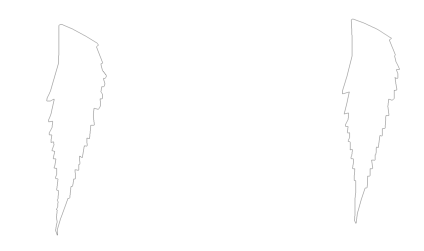

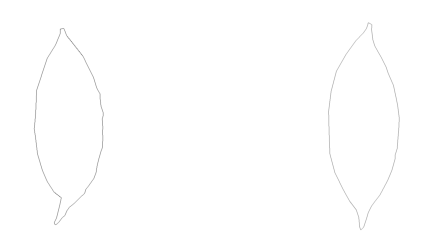

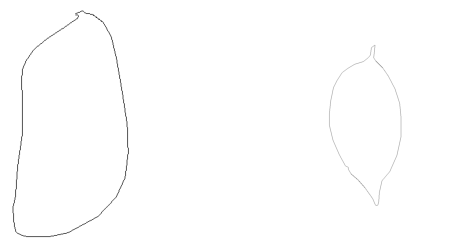

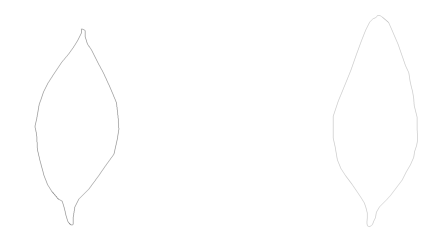

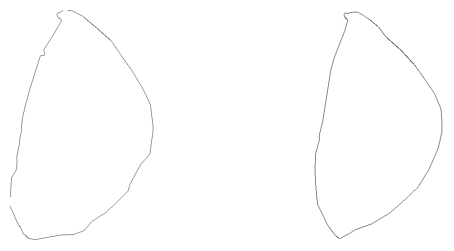

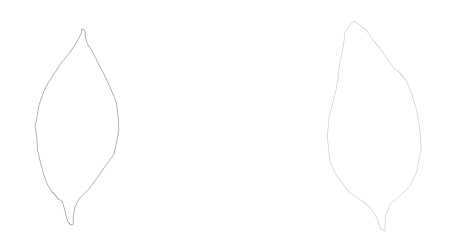

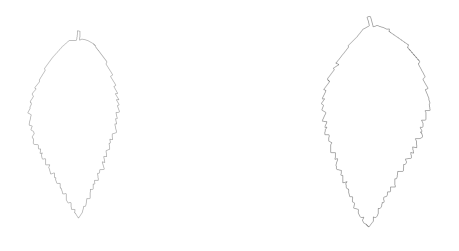

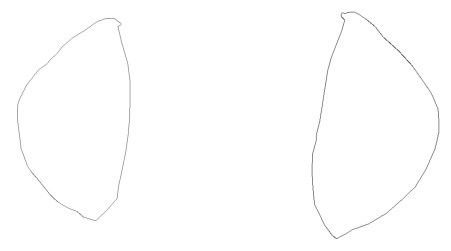

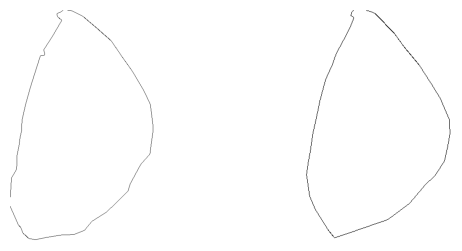

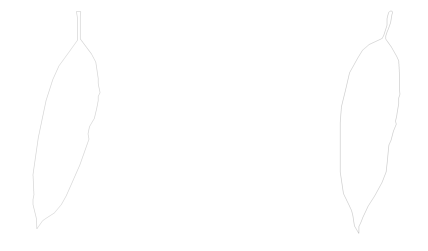

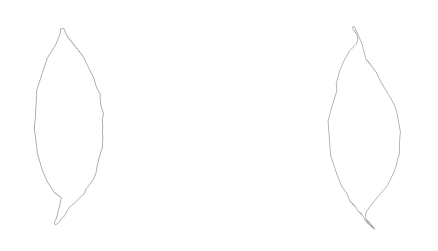

In [ ]:
plot_similar_leaves(similar, leaves)